# Introduction to Bayesian Networks - Lab Safety

In this part of the assignment, to get familiar with Bayesian Inference, you will model a lab safety investigation scenario using Bayesian networks. Your goal is to build a probabilistic model that explains the likelihood of an accident and the severity of damage in a research laboratory. You will use the [pgmpy](https://pgmpy.org) library to represent your network and to compute various probabilities via inference.

## Installations

In [1]:
%pip install pgmpy
%pip install tqdm
%pip install pygraphviz
%pip install graphviz
%pip install gymnasium
%pip install textworld-express
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Imports

We've provided you with all the necessary imports to complete this part of the assignment, but if for whatever reason you'd like to import additional libraries, you may add any imports to the marked cell below, provided that they are from the Python Standard library only. 

In [2]:
# export - DO NOT MODIFY THIS CELL
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

/opt/homebrew/Caskroom/miniconda/base/envs/CS-3600/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# export - DO NOT MODIFY OR MOVE THIS LINE
# add any additional imports here (from the Python Standard Library only!)

## The Scenario

For this part of the assignment, we'll be considering a scenario revolving around lab safety. For more details, please view the [scenario file](./scenario.md), which contains the details of the key scenario events and their probabilities. **You will need to read this file closely** to understand the scenario, the connectedness of the events, and the probabilities associated with each event to effectively model the scenario as a Bayesian network.

## Task 1 - Building the Bayesian Network

Your first task is to use the description of the scenario to design a Bayesian network of the events. To do this, we'll use `pgmpy`. The `pgmpy` package is used to represent nodes and conditional probability arcs connecting nodes. Don't worry about the probabilities for now. Use the functions below to create the net - feel free to assign whatever names you'd like to each of the nodes, but make sure the structure of the network matches the scenario.

Fill in the below function, `build_lab_safety_model`, to create the Bayesian Network. The function should return the model. You may find the following commands useful. 

```py
bayes_net = BayesianNetwork() # Creates a Bayesian Network
bayes_net.add_node("node_name_here") # adds a node
bayes_net.add_edge("parent_node", "child_node") # adds an edge from the parent to the child
```

For reference, you can find the documentation for the BayesianNetwork class [here](https://pgmpy.org/models/bayesiannetwork.html).

In [4]:
# export - DO NOT MODIFY OR MOVE THIS LINE
def build_lab_safety_model() -> BayesianNetwork:
    ### YOUR CODE BELOW HERE ###
    bayes_net = BayesianNetwork()
    bayes_net.add_edge("Training", "Adherence")
    bayes_net.add_edge("Inspection", "Adherence")
    bayes_net.add_edge("FailureEquipment", "Accident")
    bayes_net.add_edge("ResponseReadiness", "Accident")
    bayes_net.add_edge("Accident", "Severity")
    bayes_net.add_edge("Adherence", "Severity")
    return bayes_net
    ### YOUR CODE ABOVE HERE ###

### Visualizing and Verifying the Network

Now that you've built the network, we can visualize it and verify that it's correct. We've provided you with some basic code to visualize your network. We've also given a basic check to ensure that your network contains the correct number of nodes and edges. Use the visualization and this test to ensure that your network correctly depicts the relationships between the events in the scenario. _Note:_ This visualization has a `pygraphviz` dependency. You must have this installed to visualize the network. You _may_ need to run `!apt install libgraphviz-dev` (in order for this to work) in another cell. If you can't get it installed, you can skip the visualization - it is not necessary to complete the assignment.

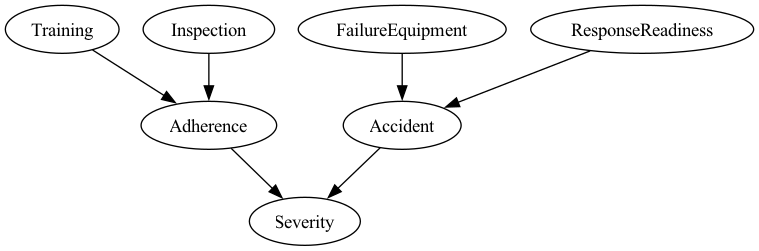

In [5]:
from helpers import visualize_bayesian_network

lab_safety_model = build_lab_safety_model()
visualize_bayesian_network(model=lab_safety_model)

In [6]:
from tests import test_lab_safety_network_nodes_and_edges

test_lab_safety_network_nodes_and_edges(lab_safety_model=lab_safety_model)

INFO:py4j.java_gateway:Callback Server Starting
INFO:py4j.java_gateway:Socket listening on ('127.0.0.1', 54926)


Your Bayesian Network has the expected number of nodes and edges!


## Task 2 - Assigning Probabilities

Now that you've built the Bayesian network, you need to set the conditional probabilities for the variables in the network, and return the updated model. Let's fill in the function `assign_lab_safety_probabilities` below. To do so, we'll use the [`TabularCPD`](https://pgmpy.org/factors/discrete.html#pgmpy.factors.discrete.CPD.TabularCPD) class from `pgmpy`. 

If you wanted to set the distribution for some arbitrary node `A` to have P(A = True) = 0.8 and P(A = False) = 0.2, you would use the following code:

```py
cpd = TabularCPD(variable="A", variable_card=2, values=[[0.2], [0.8]])
```

Notice how the `False` value is listed first. This is because the `pgmpy` uses index 0 to represent `False` and index 1 to represent `True`. Be very careful about this when setting up your CPDs. The `variable_card` argument simply denotes the number of possible values the variable can take on (in this case, it's 2 because there's only `True` and `False` - for more complex distributions that don't just involve binary values, you would set this to the number of possible values the variable can take on, e.g. 3 for P(A = low), P(A = medium), P(A = high)). 

If you wanted to set up a conditional probability distribution for a variable `G` given another variable `A`, where the probabilities are as follows:

|  A  | P(G=true given A) |
| --- | ----------------- |
|  T  | 0.75              |
|  F  | 0.85              | 

you would invoke:

```py
cpd = TabularCPD(variable='G', variable_card=2, values=[[0.15, 0.25], [0.85, 0.75]], evidence=['A'], evidence_card=[2])
```

Notice again how the `False` table is listed first. 0.15 corresponds to P(G = False | A = False), 0.25 corresponds to P(G = False | A = True), and so on. If we wanted to represent this using binary binary values, it follows the same pattern (`00`, `01`, `10`, `11`). This is why the `values` array is structured as it is, and why the `evidence_card` is set to `[2]`. 

Let's now see how we would set up a CPD for another variable, T, which is dependent on both A and G. We would do the following: 

| A   |  G  |P(T=true given A and G)|
| --- | --- |:---------------------:|
|T|T|0.15|
|T|F|0.6|
|F|T|0.2|
|F|F|0.1|

```py
cpd = TabularCPD(variable="T", variable_card=2, values=[[0.9, 0.8, 0.4, 0.85], [0.1, 0.2, 0.6, 0.15]], evidence=['A', 'G'], evidence_card=[2, 2])
```

Again, the key here is to remember that the first list of values (a list of lists) corresponds to P(T = False). You can also reorder the evidence variables in the `evidence` list to reorder the columns in the CPD, and you will still yield the same result.

Once you've constructed your CPDs, you can add them to your Bayesian network by calling [`add_cpds`](https://pgmpy.org/models/bayesiannetwork.html#pgmpy.models.BayesianNetwork.BayesianNetwork.add_cpds) on your model, which will take in `*args` of the CPDs you've created. If you want to verify the CPD's you've added, you can `print()` them (`pgmpy` will render them nicely for you). Your function should return the model with the CPDs added.

In [7]:
# export - DO NOT MODIFY OR MOVE THIS LINE
def assign_lab_safety_probabilities(model: BayesianNetwork) -> BayesianNetwork:
    ### YOUR CODE BELOW HERE ###
    cpd_training = TabularCPD(variable="Training", variable_card=2, values=[[0.2], [0.8]])
    cpd_inspection = TabularCPD(variable="Inspection", variable_card=2, values=[[0.3], [0.7]])
    cpd_failure_equipment = TabularCPD(variable="FailureEquipment", variable_card=2, values=[[0.8], [0.2]])
    cpd_response_readiness = TabularCPD(variable="ResponseReadiness", variable_card=2, values=[[0.5], [0.5]])
    cpd_adherence = TabularCPD(variable="Adherence", variable_card=2,
                              values=[[0.9, 0.5, 0.25, 0.05], [0.1, 0.5, 0.75, 0.95]],
                              evidence=["Training", "Inspection"],
                              evidence_card=[2, 2])
    cpd_accident = TabularCPD(variable="Accident", variable_card=2,
                             values=[[0.8, 0.9, 0.2, 0.6], [0.2, 0.1, 0.8, 0.4]],
                             evidence=["FailureEquipment", "ResponseReadiness"],
                             evidence_card=[2, 2])
    cpd_severity = TabularCPD(variable="Severity", variable_card=2,
                            values=[[0.9, 0.95, 0.05, 0.6], [0.1, 0.05, 0.95, 0.4]],
                            evidence=["Accident", "Adherence"],
                            evidence_card=[2, 2])
    model.add_cpds(cpd_training, cpd_inspection, cpd_failure_equipment,
                   cpd_response_readiness, cpd_adherence, cpd_accident, cpd_severity)
    assert model.check_model()
    return model
    ### YOUR CODE BELOW HERE ###

### Verifying the Consistency of the CPD With Your Network

Now, we're going to run another basic check on the CPDs that you've created. We'll verify that the CPDs are consistent with the structure of your network, and that the probabilities all sum to 1. We've provided you with a basic function to do this. You should verify the correctness of each value in each CPD by closely reading the scenario file.

In [8]:
from tests import check_lab_safety_model

lab_safety_model = build_lab_safety_model()
lab_safety_model = assign_lab_safety_probabilities(model=lab_safety_model)
check_lab_safety_model(lab_safety_model=lab_safety_model)

Your Bayesian Network has all probabilities summing to 1, and the CPDs are consistent with your defined model structure!


## Task 3 - Inference

Now that you've built your Bayesian network and assigned probabilities to all the important variables based on the information that the helpful (but snack-happy) lab staff has provided, you can now perform inference on the network to gain some insights. 

Let's calculate the following probabilities: 
* The marginal probability of severe damage. 
* The probability of severe damage given that the response team is ready. 
* The probability of severe damage given that the lab staff are well-trained and the lab has passed inspection. 

To do this, you can use the [`VariableElimination`](https://pgmpy.org/exact_infer/ve.html) class from `pgmpy`. Let's say we wanted to do inference for the marginal probability of the node "A" being True on some Bayesian network `bayes_net`. We would do the following: 

```py
v_e = VariableElimination(bayes_net)
marginal_probability = v_e.query(variables=["A"], joint=False)
mpt = marginal_probability["A"].values
```

Notice that we access the values of the marginal probability by accessing the "A" key in the dictionary returned by the `query` method. This is because the query method returns a list of two probabilities that correspond to [False, True] _in that order_. You must index in and obtain the value that you are interested in. 

Let's try computing a conditional probability. Let's say we wanted to calculate P(A = True | B = True, C = False) on some Bayesian network `bayes_net`. We would do the following: 

```py
v_e = VariableElimination(bayes_net)
conditional_probability = v_e.query(variables=["A"], evidence={"B": 1, "C": 0}, joint=False)
cpt = conditional_probability["A"].values
```

To do a quick spot check on your inference, you can run inference on a basic probability that you know the answer to. For example, running inference on P(T = True) from the given scenario should return 0.80. Due to some imprecision in machines, you may see something like 0.7999999999999999, but this is close enough to 0.80 for our purposes (we will account for this in grading). **Do NOT perform any rounding on your probabilities.**

In [9]:
# export - DO NOT MODIFY OR MOVE THIS LINE
def get_marginal_probability_damage(model: BayesianNetwork) -> float:
    ### YOUR CODE BELOW HERE ###
    v_e = VariableElimination(model)
    marginal_probability = v_e.query(variables=["Severity"], joint=False)
    mpt = marginal_probability["Severity"].values[1]
    return float(mpt)
    ### YOUR CODE ABOVE HERE ###

In [10]:
# export - DO NOT MODIFY OR MOVE THIS LINE
def get_conditional_probability_damage_given_response(model: BayesianNetwork) -> float:
    ### YOUR CODE BELOW HERE ###
    v_e = VariableElimination(model)
    conditional_probability = v_e.query(variables=["Severity"], evidence={"ResponseReadiness": 1}, joint=False)
    cpt = conditional_probability["Severity"].values[1]
    return float(cpt)
    ### YOUR CODE ABOVE HERE ###

In [11]:
# export - DO NOT MODIFY OR MOVE THIS LINE
def get_conditional_probability_damage_given_training_inspection(model: BayesianNetwork) -> float:
    ### YOUR CODE BELOW HERE ###
    v_e = VariableElimination(model)
    conditional_probability = v_e.query(variables=["Severity"], evidence={"Training": 1, "Inspection": 1}, joint=False)
    cpt = conditional_probability["Severity"].values[1]
    return float(cpt)
    ### YOUR CODE ABOVE HERE ###

### Verifying Your Inference

To test your inference, we recommend performing the calculations by hand to ensure that your network, probability distributions, and code for the marginal & conditional probabilities are correct. We will not directly provide you with the answers for each of the inference probabilities. We have given you basic tests to ensure that your Bayesian network has the right number of nodes and edges, and that your CPDs sum to 1 and align with your network structure. However, when submitting to Gradescope, you will be able to see the correctness of your inference probabilities. That is, there are **no hidden tests** for this part of the assignment. You will be able to see your results after submission. 

The below cell contains the code for defining the network, setting the probabilities, and then performing inference. You can run the below cell to see the results of all the code you've written thus far!

In [12]:
lab_safety_model = build_lab_safety_model()

lab_safety_model = assign_lab_safety_probabilities(model=lab_safety_model)
marginal_prob = get_marginal_probability_damage(model=lab_safety_model)
conditional_prob = get_conditional_probability_damage_given_response(model=lab_safety_model)
conditional_prob2 = get_conditional_probability_damage_given_training_inspection(model=lab_safety_model)

print(f"Marginal probability of damage: {marginal_prob}")
print(f"Conditional probability of damage given response: {conditional_prob}")
print(f"Conditional probability of damage given training and inspection: {conditional_prob2}")

Marginal probability of damage: 0.17004000000000002
Conditional probability of damage given response: 0.13356
Conditional probability of damage given training and inspection: 0.14250000000000004


Great work! The researchers at GTRI are very impressed with your work. They're excited to apply this model to enhance their lab safety protocols (and also, unfortunately, cut back on their snack budget). 

The results of our investigation have demonstrated how Bayesian Networks offer a great framework for modeling uncertainty in complex systems. By capturing and quantifying the probabilistic relationships among different variables, Bayes nets enable us to predict outcomes and potentially assess risks. This can be applicable to countless domains like healthcare, finance, autonomous systems, and more. 

`pgmpy` is a great library for working with Bayesian networks in Python, as it provides an intuitive interface for defining networks, specifying CPDs, and performing inference. Even with a relatively small model, we were able to compute meaningful probabilities that can provide useful insights. The interface provided by `pgmpy` makes it easy for users to build and analyze complex probabilistic models quickly at scale, making it a great tool in various contexts. 

Now that you have more familiarity with Bayesian networks and how they work with the help of `pgmpy`, we'll move onto the next part of the assignment, where you'll be implementing some Bayesian inference yourself, **without the assistance of this library.** This will give you a deeper understanding of inference and how it works under the hood.

# Applying Bayesian Learning to Ghost Hunting in TextWorld

*Text Adventure Games* are games in which the player interacts with a rich world only through text. Text adventure games predate computers with graphics. However, in many ways they are more complex than conventional video games because they can involve complicated interactions (e.g., "build a rope bridge") that require a fair amount of imagination. Indeed, text adventure games are used as [research testbeds](https://arxiv.org/abs/1909.05398) for natural language processing agents. The canonical text adventure game is [Zork](https://en.wikipedia.org/wiki/Zork), in which the player discover an abandoned underworld realm full of treasure. You can find online playable versions.

A text game is made up of individual locations--also called "rooms", though they need not be indoor enclosed spaces as the term might imply. The agent can move between rooms and interact with objects by typing in short commands like "move north" and "take lamp". We will use [TextWorld-Express](https://github.com/cognitiveailab/TextWorldExpress). Textworld-Express simplifies text worlds in a few ways: it uses a reduced set of text commands, and rooms laid out in a grid. TextWorld-Express also implements a few different game objectives, such as cooking, and searching for coins. TextWorld-Express generates world configurations, so we will need to implement algorithms that are able to complete different game objectives in different world configurations.

In this assignment, our agents will play a custom game wherein the agent must locate a ghost that cannot be directly observed based on noises that can be perceived with some probabilistic uncertainty. **We will be implementing and using Bayesian Networks to achieve this.**

## Important Notes and Guidelines
- You are **only** allowed to use a restricted set of libraries for this part of the assignment. All packages that come with the default Python installation are permitted. You may not use any other libraries. If you attempt to use other libraries, the autograder will not be able to run your code.
- TextWorldExpress requires Java 1.8 or higher to be installed on your system. For more information, see the [TextWorld-Express README](https://github.com/cognitiveailab/TextWorldExpress).
- Do not modify any function signatures or the global variables provided in the notebook. You may add additional helper functions as needed - do not add them to separate cells, as they will not be exported in the autograder. **Any helper functions should be nested within the function that uses them.**
- **Do not use `pgmpy` for this part of the assignment.** We used it to introduce the concept of Bayes nets. Integrating it with TextWorld-Express is challenging - you will find it far easier to implement your agent without it. Now, you will implement your own approach to Bayesian inference to locate the ghost!

## Misc. Tips
- If you break execution of a cell running the game engine, you might have put TextWorld-Express in an un-recoverable state. If this happens, you will need to reset your kernel/runtime.
- You **can** use the map information to help your agent. For example, you will find it useful to find all possible "open door" actions from the possible valid actions and take them (i.e., call `env.step` on that action) to help the agent explore better. 

## Imports

Like with the `pgmpy` Bayes Nets primer, we've provided you with all the necessary imports to complete this part of the assignment too, but if for whatever reason you'd like to import additional libraries, you may add any imports to the marked cell below, provided that they are from the Python Standard library only. 

In [13]:
# export - DO NOT MODIFY THIS CELL
import gymnasium
import numpy as np
from helpers import GhostTextWorldExpressEnv

In [14]:
# export - DO NOT MODIFY OR MOVE THIS LINE
# add any additional imports here (from the Python Standard Library only!)

## Ghost Hunting Overview

This environment features a ghost that cannot be seen and might be inside a room or inside the walls (not in a room). However, you can "hear" the ghost make noise. Whenever an action is taken in the world, the agent will also receive information about how far away the ghost sounds. Unfortunately, this perceived distance is noisy and sometimes it will sound farther away than it actually is, and sometimes it will sound closer than it actually is.

**Luckily, we also have another tool in our ghost hunting toolbelt**: We are given a special sensor that can give us a distribution of the horizonal (X coordinate) distance of the ghost from the origin of our grid.

The agent's goal is to locate where the ghost is.

The `infos` returned by the `env.step()` action returns many useful pieces of information, including the following:
- `infos['ghost']` holds a distance (Manhattan distance) to the ghost. This is a "noisy" distance--it may not be the actual distance to the ghost.
- `infos['distribution']` holds a distribution over possible noisy distance values, as a numpy array where the index is the number of units away (Manhattan distance). For example, if `infos['ghost'] = 6` then the distribution will tell you the probability that that value is accurate. If the distribution is:
```
[0.         0.0106383  0.0212766  0.04255319 0.08510638 0.17021277 0.34042553 0.17021277 0.08510638 0.04255319 0.0212766 ]
```
then there is ~34% probability that the ghost is actually 6 units away, but there is ~17% probability that the ghost is actually 5 units away.
- `infos['x_dist_distribution']` holds the distribution of the noisy x distance of the ghost from the origin, as a numpy array where the index is the number of units away (Manhattan distance). This operates the same way as the distribution explained above, but for x distance rather than manhattan distance.
- `infos['player']` holds the `(x, y)` position of the player/agent.
- `infos['validActions']` holds the list of valid actions that can be taken from the current state.

Feel free to print out `infos` to see what all the information looks like. 

The agent must guess the `(x, y)` position of the ghost. Once it has a reliable guess, it can perform a special action, `'report'`, which is followed by two numbers separated by spaces that indicate the ghost's x and y position (e.g., `'report 3 4'` would indicate that the agent thought the ghost was in position x=3, y=4). If the guess is correct, the observation returned will be `'True'` and if it is wrong, the observation returned will be `'False'`. **Once a report is made, the agent cannot perform any further actions.**

## Environment Setup

New environments must be registered through the Gymnasium API.

In [15]:
gymnasium.register(id='TextWorldExpress-GhostTextWorldExpressEnv-v0', entry_point='__main__:GhostTextWorldExpressEnv')

Set the game type and game parameters, and load the environment information into global variables (described below). 

**Note:** We have provided samples for the `GAME_PARAMS` variables. While we do provide a function to test your search algorithms with each of these environments automatically, to closely and thoroughly test and verify the correctness of your implementations, we recommend loading other environemnts and testing your code with then. 

In [16]:
# set the seed and create the environment
SEED = 3
ENV = GhostTextWorldExpressEnv(envStepLimit=100)

# set the game type and parameters
# change the game type and parameters here to test different environments
GAME_TYPE = "coin"
GAME_PARAMS = "numLocations=5,includeDoors=1,numDistractorItems=0"
# GAME_TYPE="mapreader"
# GAME_PARAMS="numLocations=5,maxDistanceApart=3,includeDoors=0,maxDistractorItemsPerLocation=0"

# load the evironment
ENV.load(gameName=GAME_TYPE, gameParams=GAME_PARAMS)

INFO:py4j.java_gateway:Callback Server Starting
INFO:py4j.java_gateway:Socket listening on ('127.0.0.1', 54929)


Reset the environment (same as before).

In [17]:
obs, infos = ENV.reset(seed=SEED, gameFold="train", generateGoldPath=True)
print(obs)
print('player:', infos['player'])
print('ghost noisy distance:', infos['ghost'])
print('distribution:', infos['distribution'])
print('distribution:', infos['x_dist_distribution'])

self.__ghost:  (-5, -5)
You are in the kitchen. In one part of the room you see a stove. There is also an oven. You also see a fridge that is closed. In another part of the room you see a counter, that has nothing on it. In one part of the room you see a kitchen cupboard that is closed. There is also a cutlery drawer that is closed. You also see a trash can that is closed. In another part of the room you see a dishwasher that is closed. In one part of the room you see a dining chair, that has nothing on it. 
To the South you see a closed sliding patio door. To the West you see a closed frosted-glass door. 
You hear a ghost 13.00 rooms away.
player: (0, 0)
ghost noisy distance: 13
distribution: [0.         0.         0.         0.         0.         0.
 0.         0.         0.0106383  0.0212766  0.04255319 0.08510638
 0.17021277 0.34042553 0.17021277 0.08510638 0.04255319 0.0212766
 0.0106383  0.         0.        ]
distribution: [0.0212766  0.04255319 0.08510638 0.17021277 0.34042553 

## Demo - Executing a Step

In [18]:
obs, reward, done, infos = ENV.step('move north')
print(obs)
print('player:', infos['player'])
print('ghost noisy distance:', infos['ghost'])
print('distribution:', infos['distribution'])
print('distribution:', infos['x_dist_distribution'])

Unknown action: I'm not sure what you mean.
player: (0, 0)
ghost noisy distance: 11
distribution: [0.         0.         0.         0.         0.         0.
 0.0106383  0.0212766  0.04255319 0.08510638 0.17021277 0.34042553
 0.17021277 0.08510638 0.04255319 0.0212766  0.0106383  0.
 0.         0.         0.        ]
distribution: [0.0106383  0.0212766  0.04255319 0.08510638 0.17021277 0.34042553
 0.17021277 0.08510638 0.04255319 0.0212766  0.0106383  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        ]


Report a guess (this will be wrong). 

In [19]:
obs, reward, done, infos = ENV.step('report -2 -1')
print(obs, type(obs))
print(reward)
print(done)
print(infos, type(infos))

False <class 'str'>
-1.0
True
{} <class 'dict'>


## Task - Building Your Agent

Your task now is to implement your agent in the `run_agent()` function. The agent takes in an the environment `env` and an alpha value `alpha`. It returns a guess of the ghost's location, which should be the `(x, y)` location where x and y are integers. You will want to report when you have a confidence of at least `alpha`.

The ghost will be located in the box (including the border) defined by the coordinates: `(d, d)`, `(-d, d)`, `(-d, -d)`, `(d, -d)`. `d` is the max_dist of the environment, which can be retrieved by calling `env.get_max_dist()`.

Use the `env.step()` function to execute actions.

**Do not read private data from the ENV variable, this will result in a 0.**

Interact using only with calling the `env.step()` and `env.get_max_dist()` methods and the results returned from these method calls.

Also, do not call `env.reset()`, as this will change the ghost's location to a new, random location.

You **can** use the map information to help your agent. For example, you will find it useful to find all possible "open door" actions from the possible valid actions and take them (i.e., call `env.step` on that action) to help the agent explore better. 

In [20]:
# export - DO NOT MODIFY OR MOVE THIS LINE
def run_agent(env: GhostTextWorldExpressEnv, obs: str, infos: dict, alpha: float=0.5) -> tuple[int, int]:
    guess_x, guess_y = None, None
    ### YOUR CODE BELOW HERE
    distance = env.get_max_dist()
    s = 2*distance+1
    bel = np.ones((s, s))/(s * s)
    t = infos['player']
    v = {t}
    while True:
        distribution = infos['distribution']
        x_dist_distribution = infos['x_dist_distribution']       
        for i in range(-distance, distance+1):
            for j in range(-distance, distance+1):
                if abs(t[0] - i) + abs(t[1] - j) < len(distribution):
                   dl = distribution[abs(t[0] - i) + abs(t[1] - j)]
                else:
                   dl = 0.0
                if abs(i) < len(x_dist_distribution):
                   xl = x_dist_distribution[abs(i)]
                else:
                   xl = 0.0
                bel[i + distance, j + distance] *= dl * xl
            summ = np.sum(bel)
        if summ > 0:
            bel = bel / summ
        else:
            bel = np.ones((s, s)) / (s * s)
        pr = np.max(bel)
        if pr > alpha:
            guess_x, guess_y = np.unravel_index(np.argmax(bel), bel.shape)
            return guess_x - distance, guess_y - distance
        moves = []
        for action in infos['validActions']:
            if action.startswith('open door') or action.startswith('move'):
                moves.append(action)
        if not moves:
            break
        act = None
        mv= float("inf")
        pos = t
        for action in moves:
            p1 = pos[0]
            p2 = pos[1]
            if action == "move north":
                c = (p1, p2 + 1)
            elif action == "move east":
                c = (p1 + 1, p2)
            elif action == "move south":
                c = (p1, p2 - 1)
            elif action == "move west":
                c = (p1 - 1, p2)
            else:
                c = pos
        v1 = 0
        for p in v:
            if (abs(p[0] - c[0]) <= 1 and abs(p[1] - c[1]) <= 1):
                v1 = v1 + 1
        if v1 < mv:
            mv = v1
            act = action
        if act is None:
            break
        obs, reward, done, infos = env.step(act)
        t= infos['player']
        v.add(t)
        guess_x, guess_y = np.unravel_index(np.argmax(bel), bel.shape)
        guess_x -= distance
        guess_y -= distance
    ## YOUR CODE ABOVE HERE
    return guess_x, guess_y


## Testing Your Agent

When we test your solution, we will execute your `run_agent()` method on a variety of game environments. Your agent should locate the ghost on average `alpha` percent of the time. Below is a sample for one environment. `self.__ghost` location should match the `(x,y)` returned from your agent at least alpha percent of the time.

In [21]:
# change the game type and parameters here to test different environments
GAME_TYPE = "coin"
GAME_PARAMS = "numLocations=5,includeDoors=1,numDistractorItems=0"
# GAME_TYPE="mapreader"
# GAME_PARAMS="numLocations=5,maxDistanceApart=3,includeDoors=0,maxDistractorItemsPerLocation=0"

ENV.load(gameName=GAME_TYPE, gameParams=GAME_PARAMS)

# Run agent and see if it locates the ghost
obs, infos = ENV.reset(0)
x, y = run_agent(ENV, obs, infos, alpha = 0.9)
print(x, y)

self.__ghost:  (3, 4)
3 4


Testing the agent on all provided configurations.

In [22]:
from tests import test_all_configs

test_all_configs(run_agent=run_agent, alpha_param=0.95)

coin numLocations=5,includeDoors=1,numDistractorItems=0 0
self.__ghost:  (5, 0)
Guess: ( 5 ,  0 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 1
self.__ghost:  (-4, 5)
Guess: ( -4 ,  5 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 2
self.__ghost:  (2, 2)
Guess: ( 2 ,  2 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 3
self.__ghost:  (3, -4)
Guess: ( 3 ,  -4 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 4
self.__ghost:  (0, 2)
Guess: ( 0 ,  2 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 5
self.__ghost:  (0, -2)
Guess: ( 0 ,  -2 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 6
self.__ghost:  (-4, 0)
Guess: ( -4 ,  0 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 7
self.__ghost:  (-1, 4)
Guess: ( -1 ,  -4 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 8
self.__ghost:  (-1, -1)
Guess: ( -1 ,  -1 )
coin numLocations=5,includeDoors=1,numDistractorItems=0 9
self.__ghost:  (-1, 1)
Guess: ( -1 ,  1 )
coi

Your agent should get the correct answer on average **at least** `alpha` percent of the runs. So if alpha is 0.9, your agent should be getting the report correct (written as True in the dictionary `final_results`) on average 90% of the time. This can be used to verify your solution is working as intended.

# Grading

Your score for this part of the assignment will be out of **50 points**. 

15 points will be awarded for correctly completing the Bayesian inference scenario with the lab safety investigation. The unit tests provided in this part of the assignment are identical to the ones that we will use to grade your solution. There are **no hidden tests** for this part of the assignment. If you pass the tests in Gradescope, you will receive full credit for this part of the assignment.
* 3 points for correctly building the Bayesian network.
* 3 points for building the CPDs such that all their values sum to 1 and are consistent with the network structure.
* 3 points each (9 points total) for correctly calculating the marginal and conditional probabilities specified. 


35 points will be awarded for the ghosting hunting scenario. We will base your grading based on the ability on your implemention to correctly identify the ghost based on the alpha parameters. We will test your code on hidden seeds and environments with various alpha values, and average your code over multiple different trials to ensure fairness.

Additionally, there will be a generous "fudge" built into the autograder to account for the randomness inherent in the environment. This ensures that a correct solution should not be penalized for randomness.

Your final score on the hidden environments will be shown on Gradescope when grades are officially published. We will provide sanity checks on a different set of environments/seeds to allow you to verify that your code works as expected in the autograder - ***the sanity checks do not guarantee your code's performance on the hidden tests.*** You have the ability to load any environment you want to test your code on, and we recommend you do so to ensure your code is working as expected. Any bad environments (i.e., environments that TextWorld cannot load properly) will be skipped and will not count towards your grade. 

**We will have checks in place to prevent any shortcuts taken to circumvent the autograder. Being flagged by these checks will lead to further review and a potential 0 on the assignment.**

# Submission Instructions

Upload this notebook with the name `submission.ipynb` file to Gradescope. The autograder will **only** run successfully if your file is named this way. You must ensure that you have removed all print statements from **your** code, or the autograder may fail to run. Excessive print statements will also result in muddled test case outputs, which makes it more difficult to interpret your score. 

We've added appropriate comments to the top of certain cells for the autograder to export (`# export`). You do NOT have to do anything (e.g. remove print statements) to cells we have provided - anything related to those have been handled for you. You are responsible for ensuring your own code has no syntax errors or unnecessary print statements. You ***CANNOT*** modify the export comments at the top of the cells, or the autograder will fail to run on your submission.

You should ***not*** add any cells that your code requires to the notebook when submitting. You're welcome to add any code as you need to extra cells when testing, but they will not be graded. Only the provided cells will be graded. As mentioned in the top of the notebook, **any helper functions that you add should be nested within the function that uses them.**

If you encounter any issues with the autograder, please feel free to make a post on Ed Discussion. We highly recommend making a public post to clarify any questions, as it's likely that other students have the same questions as you! If you have a question that needs to be private, please make a private post.